In [3]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.mlab as mlab
import scipy.stats as ss

"""
CDF - Using Different Continuous Function to generate the distribution
"""

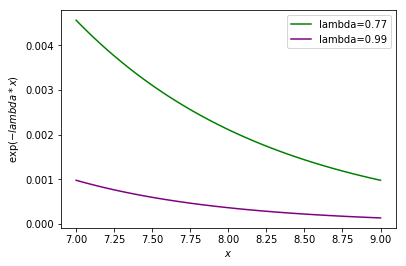

In [59]:
# Continuous Function 1 - Exponential Function: CDF(x) = 1-exp(-lambda*x)
## Complementary CDF (CCDF): CCDF(x) = exp(-lambda*x) 

lambda1 = 0.77
lambda2 = 0.99
x = np.linspace(7, 9, 100)  # generate 100 evenly spaced number between 7 & 9
y1 = np.exp(-lambda1*x)
y2 = np.exp(-lambda2*x)

plt.figure()
plt.plot(x, y1, c='green', label='lambda=0.77')
plt.plot(x, y2, c='purple', label='lambda=0.99')
plt.xlabel('$x$')
plt.ylabel('$\exp(-lambda*x)$')
plt.legend()
plt.show()

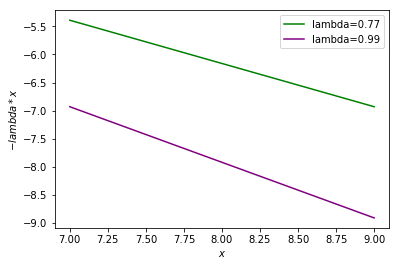

In [61]:
# If we take log of y in CCDF, we should be able to get linear line, because ln(y) = -lambda*x
## The plot here is to prove we can get linear lines
logy1 = [math.log(elem) for elem in y1]
logy2 = [math.log(elem) for elem in y2]

plt.figure()
plt.plot(x, logy1, c='green', label='lambda=0.77')
plt.plot(x, logy2, c='purple', label='lambda=0.99')
plt.xlabel('$x$')
plt.ylabel('$-lambda*x$')
plt.legend()
plt.show()

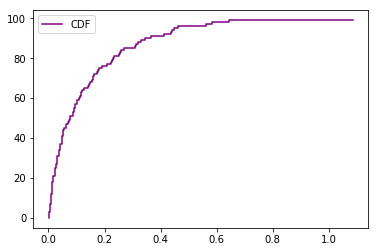

In [83]:
# Python random expovariate() generates numbers that are exponential distributed
random.seed(410)
cdf = [random.expovariate(7) for r in range(100)]  # lambda=7 here
sorted_data1 = np.sort(cdf)
plt.step(sorted_data1, np.arange(sorted_data1.size), c='purple', label='CDF')
plt.legend()
plt.show()

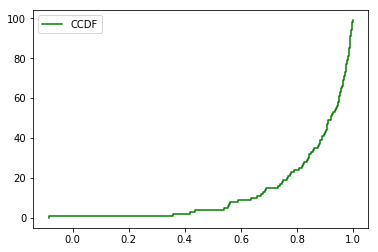

In [84]:
random.seed(410)
ccdf = [-random.expovariate(7)+1 for r in range(100)]  # lambda=7 here
sorted_data2 = np.sort(ccdf)
plt.step(sorted_data2, np.arange(sorted_data2.size), c='green', label='CCDF')
plt.legend()
plt.show()

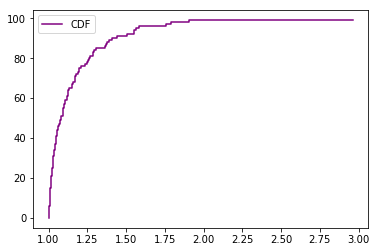

In [85]:
# Pareto Distributon
# CDF(x) = 1- pow(x/xm, -alpha)
# CCDF(x) = pow(x/xm, -alpha)

## In python paretovariate, you can set alpha, xm=1 by default. You can use x/xm if your xm is not 1
random.seed(410)
cdf = [random.paretovariate(7) for r in range(100)]  # alpha=7 here
sorted_data1 = np.sort(cdf)
plt.step(sorted_data1, np.arange(sorted_data1.size), c='purple', label='CDF')
plt.legend()
plt.show()

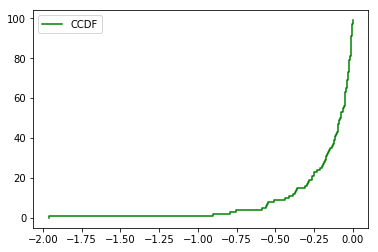

In [86]:
random.seed(410)
ccdf = [-random.paretovariate(7)+1 for r in range(100)]  # alpha=7 here
sorted_data2 = np.sort(ccdf)
plt.step(sorted_data2, np.arange(sorted_data2.size), c='green', label='CCDF')
plt.legend()
plt.show()

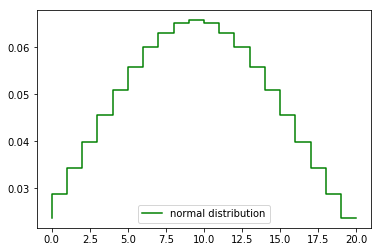

In [101]:
# Normal Distribution
x = np.arange(-10, 11)
xU, xL = x + 0.5, x - 0.5 
## scale is standard deviation, loc is mean (0 by default)
prob = ss.norm.cdf(xU, scale = 7) - ss.norm.cdf(xL, scale = 7)  
prob = prob / prob.sum()  # normalize so that the sum is 1

sorted_data = np.sort(prob)
plt.step(np.arange(prob.size), prob, c='green', label='normal distribution')
plt.legend()
plt.show()

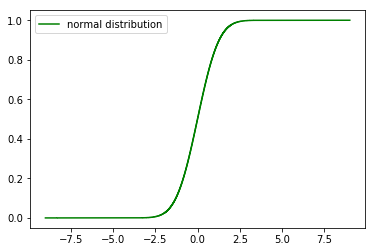

In [106]:
# CDF with a normal distribution
from scipy.special import erf

high = 9   # how many standard deviation above the mean
low = -high  # how many standard deviation below the mean
digits=2
n = (high - low) * 10**digits + 1
xs = np.linspace(low, high, n)
ps = (erf(xs / math.sqrt(2.0)) + 1) / 2

plt.step(xs, ps, c='green', label='normal distribution')
plt.legend()
plt.show()

# reference: http://greenteapress.com/thinkstats/erf.py

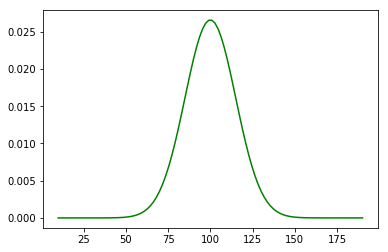

In [10]:
# This is Adult Intelligence scale: mu=100, sigma=15
## k means it the min, max exceeds mean k standard deviation. k=6 the highest IQ is 190

mu = 100
sigma = 15
k=6
x = np.linspace(mu - k*sigma, mu + k*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma),c='green')
plt.show()

In [12]:
import pandas as pd

preg_raw = pd.read_csv("2002FemPregOut.csv")
preg_raw = preg_raw.dropna()
preg_raw.head()

,caseid,nbrnaliv,babysex,birthwgt_lb,birthwgt_oz,prglngth,outcome,birthord,agepreg,finalwgt
0,1,1.0,1.0,8.0,13.0,39,1,1.0,3316.0,6448.271112
1,1,1.0,2.0,7.0,14.0,39,1,2.0,3925.0,6448.271112
2,2,3.0,1.0,9.0,2.0,39,1,1.0,1433.0,12999.542264
3,2,1.0,2.0,7.0,0.0,39,1,2.0,1783.0,12999.542264
4,2,1.0,2.0,6.0,3.0,39,1,3.0,1833.0,12999.542264


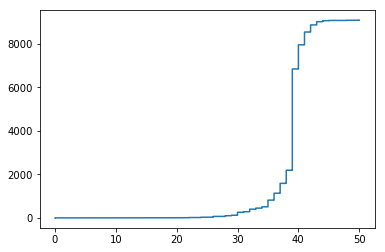

In [32]:
# Looks like normal distribution
sorted_data = np.sort(preg_raw['prglngth'])
plt.step(sorted_data, np.arange(sorted_data.size)) 
plt.show()

38.5680642676 2.68779888561


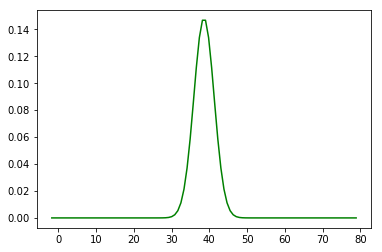

In [25]:
# Now plot a normal distribution with the same mean and standard deviation
mu = preg_raw['prglngth'].mean()
sigma = preg_raw['prglngth'].std()
print mu, sigma
k=15  # mu-k*sigma=0 in this case
x = np.linspace(mu - k*sigma, mu + k*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma),c='green')
plt.show()

In [39]:
# Compute rankits
# You have multiple samples of normal distribution, zip ith values together as ith list, get mean for each list,
# this mean is the rankit.
# ith rankit is the mean of ith values in multiple normal distribution samples
## reference: http://greenteapress.com/thinkstats/rankit.py
from statistics import mean

def get_sorted_normal_sample(sample_size):
    s = [random.normalvariate(0,1.0) for i in range(sample_size)]
    s.sort()
    return s

def get_sample_set(single_sample_size, sample_count):
    sample_set = [get_sorted_normal_sample(single_sample_size) for j in range(sample_count)]
    return sample_set

def get_rankits(single_sample_size, sample_count):
    t = get_sample_set(single_sample_size, sample_count)
    t = zip(*t)
    means = [mean(elem) for elem in t]
    return means

def get_sorted_lognormal_sample(sample_size):
    s = [math.log(abs(random.normalvariate(7,9))) for i in range(sample_size)]
    s.sort()
    return s

def get_lognormal_sample_set(single_sample_size, sample_count):
    sample_set = [get_sorted_lognormal_sample(single_sample_size) for j in range(sample_count)]
    return sample_set

def get_logrankits(single_sample_size, sample_count):
    t = get_lognormal_sample_set(single_sample_size, sample_count)
    t = zip(*t)
    means = [mean(elem) for elem in t]
    return means

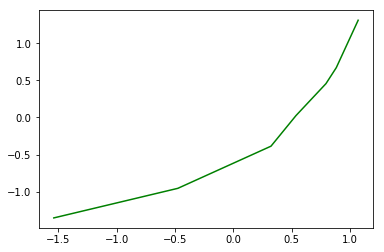

In [26]:
# When the plot is closer to a straight line with x-axis and y-axis are in the same range & scale,
## it's closer to a normal distribution

# Normal probability plot - sorted data sample (x-axis), rankits from normal distribution samples
random.seed(410)
single_sample_size=7 
sample_count = 9
rankits = get_rankits(single_sample_size, sample_count)

xs = [random.normalvariate(0.0, 1.0) for i in range(sample_size)]
plt.clf()
plt.plot(sorted(xs), rankits, c='green')

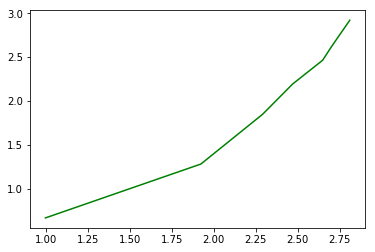

In [40]:
# lognormal distribution
# log the values in normal distribution

random.seed(410)
single_sample_size=7 
sample_count = 9
rankits = get_logrankits(single_sample_size, sample_count)

xs = [math.log(abs(random.normalvariate(7, 9))) for i in range(sample_size)]
plt.clf()
plt.plot(sorted(xs), rankits, c='green')

In [ ]:
"""
To sum up what I did above:
1. Python methods to generate random values based on different CDF continuous function
2. Plot different CDF
3. Mehtods to tell whether a certain dataset satisfy a certain distribution

Knowing CDF continuous function formula, we can also generate random numbers based on a certain distribution,
but it's easier to use pyton built-in functions
"""